**Syed Ishmum**

**July 31st, 2023**

**BrainStation**

**Data Science, cohort of May 15th - Aug 4th, 2023**

[sydishmum@gmail.com]

[https://www.linkedin.com/in/syed-ishmum/]

[https://github.com/sai-gh]

## Popularity Prediction Model using Spotify Dataset

### Summary:

Welcome to this Jupyter Notebook project for building a popularity prediction model using the Spotify dataset. Our goal is to develop a powerful machine learning model that accurately predicts song popularity by analyzing various features of songs available on Spotify.

This model holds immense potential for new and upcoming artists as well as record labels. It can provide valuable insights and feedback on the potential success of songs, guiding artists in making informed decisions about music production and marketing strategies. For record labels, it becomes a game-changer in identifying promising talent and allocating resources more efficiently.

To make our model even more robust, we plan to integrate user data in the future. By leveraging real-time information, such as streaming counts and user feedback, we can overcome cold-start challenges and adapt to emerging music trends. Our commitment also lies in addressing ethical concerns, ensuring user privacy, and building trust with our users.

With a focus on accuracy and sensitivity to industry needs, we aim to revolutionize the music industry through data-driven insights. Let's embark on this exciting journey and unleash the potential of music data analytics!

---
<h1>Table of Contents</h1>

<h3>1. Introduction:</h3>
<ol>
    <li><a href="#dc">Data Dictionary</a></li>
    <li><a href="#ion">Introduction, Objective and Navigation</a></li>
    <li><a href="#di">Data Intergration</a></li>
</ol>

<h3>2. Feature Engineering:</h3>
<ol>
    <li><a href="#binarize">Binarization</a></li>
    <li><a href="#nvsvv">Numerical vs Non-numarical</a></li>
    <li><a href="#ccba">Corralation comparision before and after Binarization</a></li>
    <li><a href="#vizccba">Visual comparision of correlation difference before and after Binarization</a></li>
</ol>

<h3>3. Baseline Prediction Models:</h3>
<ol>
    <li><a href="#m1">Model 1: Logestic Regression</a></li>
    <li><a href="#m2">Model 2: Decision Tree</a></li>
    <li><a href="#m3">Model 3: Random Forest</a></li>
    <li><a href="#m4">Model 4: XGBoost</a></li>
    <li><a href="bmc">Base Model Comparision</a></li>
</ol>

<h3>4. Hyperparameter Tuning:</h3>
<ol>
    <li><a href="#hpt">What is Hyperparameter Tuning?</a></li>
    <li><a href="#rf2">Precision-tuned Random Forest</a></li>
    <li><a href="#xgb2">Precision-tuned XGBoost</a></li>
</ol>

<h3>7. Conclusion:</h3>
<ol>
    <li><a href="#con">Summarizing our findings and the effectiveness of the popularity prediction model Percision-tuned XGBoost</a></li>
    <li><a href="#fpl">Talking about future plans about how we can futher improve our tuned model with user data and real world use cases</a></li>
</ol>

Please feel free to explore the notebook as you like. This is the flow of the notebook, going to least complicated model to the most complicated hyperparameter tuned model for our use case.

---

---
<a id="dc"></a>


## Data Dictionary

| Column Name       | Description                                                                                                                                                     | Data Type    |
|-------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------|
| track_id          | The Spotify ID for the track.                                                                                                                                   | object       |
| artists           | The artists' names who performed the track. If there is more than one artist, they are separated by a ';'                                                       | object       |
| album_name        | The album name in which the track appears.                                                                                                                      | object       |
| track_name        | Name of the track.                                                                                                                                             | object       |
| popularity        | The popularity of a track, represented as an integer between 0 and 100.                                                                                         | int64        |
| duration_ms       | The track length in milliseconds.                                                                                                                               | int64        |
| explicit          | Whether or not the track has explicit lyrics.                                                                                                                   | bool         |
| danceability      | Describes how suitable a track is for dancing, ranging from 0.0 (least danceable) to 1.0 (most danceable).                                                       | float64      |
| energy            | Represents a perceptual measure of intensity and activity, ranging from 0.0 to 1.0.                                                                             | float64      |
| key               | The key the track is in, mapped to pitches using standard Pitch Class notation.                                                                                | int64        |
| loudness          | The overall loudness of a track in decibels (dB).                                                                                                               | float64      |
| mode              | Indicates the modality (major or minor) of a track, represented as 1 (Major) or 0 (Minor).                                                                      | int64        |
| speechiness       | Detects the presence of spoken words in a track, ranging from 0.0 to 1.0.                                                                                        | float64      |
| acousticness      | A confidence measure of whether the track is acoustic, ranging from 0.0 to 1.0.                                                                                 | float64      |
| instrumentalness  | Predicts whether a track contains no vocals, ranging from 0.0 to 1.0.                                                                                            | float64      |
| liveness          | Detects the presence of an audience in the recording, ranging from 0.0 to 1.0.                                                                                   | float64      |
| valence           | A measure of the musical positiveness conveyed by a track, ranging from 0.0 to 1.0.                                                                             | float64      |
| tempo             | The overall estimated tempo of a track in beats per minute (BPM).                                                                                                | float64      |
| time_signature    | An estimated time signature, indicating the number of beats in each bar (or measure).                                                                           | int64        |
| track_genre       | The genre in which the track belongs.                                                                                                                           | object       |

---


<a id="ion"></a>
**Introduction:**

Welcome to the Song Popularity Prediction Model project! Our goal is to build a prediction model that accurately predicts the popularity of songs based on various features. The dataset we'll be working with is obtained from Spotify and contains valuable information about artists, album names, danceability, energy, and more.

**Objective:**

The primary objective of this project is to develop a machine learning model that can predict the popularity of songs. Popularity plays a significant role in the music industry, reflecting the overall appeal and acceptance of a song among listeners.

**Navigation:**

This Jupyter Notebook is organized into different sections, each focusing on specific aspects of the popularity prediction model. Use the provided Table of Contents to navigate seamlessly through the notebook. Each section contains explanations, code snippets, and visualizations to guide you through the process of building the song popularity prediction model.


### Libraries

In [108]:
#Libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

<a id="di"></a>
### Data intigration

In [109]:
# We will define out dataset as "data"
data = pd.read_csv('dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [110]:
data.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [111]:
# Dropping the null value row
data = data.dropna()

# We are dropping this column becasue it is not just an indext column for the dataset
data = data.drop(['Unnamed: 0'], axis=1)

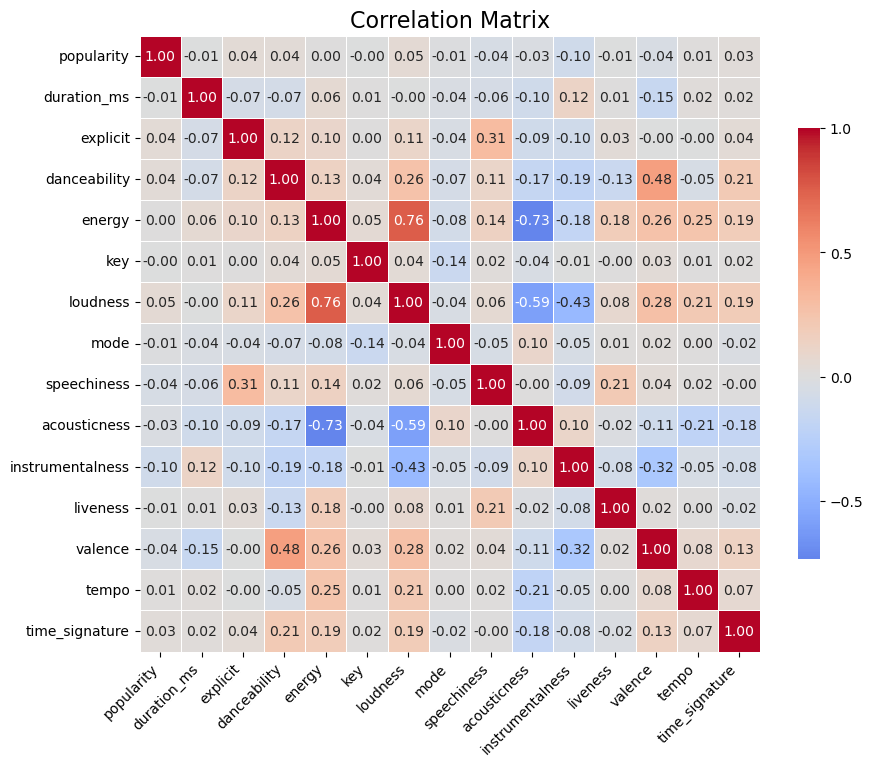

In [112]:
# Getting the numerical column names of the DataFrame
numerical_columns = data.columns.drop(['track_id','artists','album_name','track_name','track_genre'])


# Plotting correlation matrix to see overall numerical correlations
correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5,
            cbar_kws={"shrink": 0.7, "ticks": [-1, -0.5, 0, 0.5, 1]})

plt.title('Correlation Matrix', fontsize=16)

# Beautify x and y-axis labels
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.show()

_Fig 0.1: A visual representation of our dataset's correlation matrix_

We are reproduced some basic EDA that was done to the datset for consistency when entering the fearute engineering phase of out project!

## Feature Engineering

<a id="binarize"></a>
### Binarization

Now that we had a look at EDA from the previous notebook, we can see that because of the reletivly low correlations of other features with the target variable 'popularity', a liniar model will not perform well as all. Instead of that, I will be binarizing the the target variable into a new feature as 'popularity_flag', it will be much easier to work with clasification models now!}

Here are some more reasons why we might want to binarize the "popularity" target variable:

1. **Simplification:** Binarizing the target variable simplifies the problem by converting it into a binary classification task (popular or not popular). This makes it easier to apply classification algorithms that require binary labels.

2. **Interpretability:** Binary classification allows you to interpret the model's predictions more intuitively. Instead of predicting exact popularity values, the model will output a clear distinction between popular (1) and not popular (0) songs.

3. **Focus on Popularity Threshold:** By setting a threshold (e.g., 50) to distinguish between popular and less popular songs, you can focus on predicting songs that are above or below that popularity threshold. This can be useful if you are primarily interested in identifying highly popular songs.

4. **Class Imbalance:** If the dataset has a class imbalance (e.g., many more popular songs than less popular songs), binarizing the target variable can help balance the classes and prevent the model from being biased toward predicting the majority class.

5. **Consistency with Business Logic:** In some cases, the definition of popularity might be binary in nature for the application. For example, a music streaming platform might classify songs as "hits" (popular) or "non-hits" (less popular) based on a specific popularity threshold.


In [113]:
# Binarizing 'popularity' as 'populatiry_flag'
data['popularity_flag'] = 0
data.loc[data['popularity'] > 50, 'popularity_flag'] = 1

Now, the 'popularity_flag' column contains binary values where 0 represents songs with popularity less than or equal to 50, and 1 represents songs with popularity greater than 50. This transformation will allow us to approach the classification problem, making it easier to predict whether a song will be popular or not.

For educational purposes, we should know that, by doing this we do loose some information that might help us. Later in the future it is my plan to fit some high performing models with different thesholds to see how the performance might change.

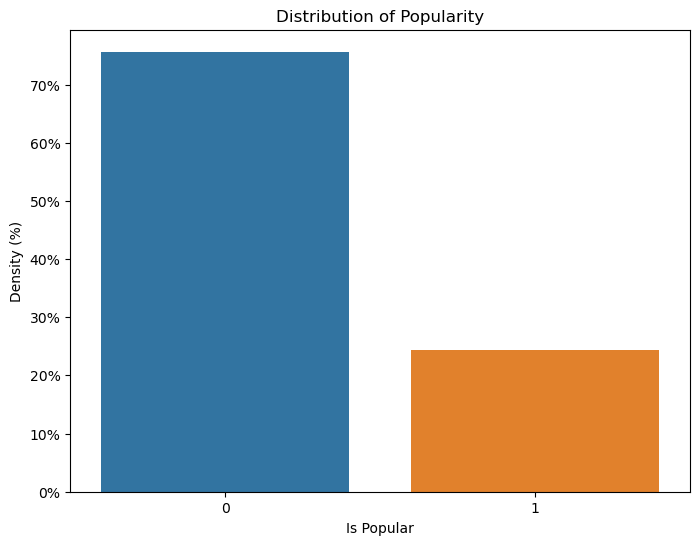

In [114]:
plt.figure(figsize=(8, 6))

# Calculate the density as a percentage for each category in 'popularity_flag'
density_percentage = data['popularity_flag'].value_counts(normalize=True) * 100

# Plotting the bar plot with density scaled to percentage
sns.barplot(x=density_percentage.index, y=density_percentage.values)

# Formatting y-axis ticks as percentages
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(100))

# Adding labels and title
plt.xlabel('Is Popular')
plt.ylabel('Density (%)')
plt.title('Distribution of Popularity')

# Displaying the plot
plt.show()

_Fig 0.2: A visual representation of out class variable and class imbalance **after Binarization of target variable**_

We can see that even with the binarization, the distribution of popular to not popular stay respectively similar. __There is a clear class im balance.__ There are many ways of dealing with this issue, the methods I will be focusing on is using ensemble models (later on the project) and using other evaluation metrics such as pressition and ROC curve along side accuracy to detirmine the best model for our project.

<a id="nvsnn"></a>
### Numerical vs Non-numerical columns

Now that we are getting closer to modeling proccess, we need to take care of all of your non-numerical colunmns! Let's take a look at how our dataset is looking like so far.

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           11

We still have 6 more columns that are still in object data type. Off the bet, we will set aside 'track_genre', I want my model to work with the genre information, that way it can look at how differnt genres may affect the popularity outcome! __We will do this by blowing up the column 'track_genre' into dummie variables.__

I would love to keep artist names, but at this point, the classification models will not be able to interpit it, unless we use a Neaural Network model that way we can utilise the models complexcity to interpret 'artists' and 'track_name'. But becasue we are going to use stric classifier models, __we will be dropping them along side 'track_id','album_name',and'popularity'(since we already have 'popularity_flag')__

In [116]:
# Dropping all the non-numerical columns that cannot be turned into dummie variables
data2 = data.drop(['track_id','artists','album_name','track_name','popularity'], axis=1)

In [117]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113999 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_ms       113999 non-null  int64  
 1   explicit          113999 non-null  bool   
 2   danceability      113999 non-null  float64
 3   energy            113999 non-null  float64
 4   key               113999 non-null  int64  
 5   loudness          113999 non-null  float64
 6   mode              113999 non-null  int64  
 7   speechiness       113999 non-null  float64
 8   acousticness      113999 non-null  float64
 9   instrumentalness  113999 non-null  float64
 10  liveness          113999 non-null  float64
 11  valence           113999 non-null  float64
 12  tempo             113999 non-null  float64
 13  time_signature    113999 non-null  int64  
 14  track_genre       113999 non-null  object 
 15  popularity_flag   113999 non-null  int64  
dtypes: bool(1), float64(

Now we are left with only one object, 'track_genre', we will come back to this column and turn it into dummie variables in a bit.

__But for my personal exploration, i want to see how the correlation might have changed between my target variable and other features now that we binarized it.__ So we will redo some correlation graphs to see how the binarization affected my relationships with all the other features! My asumtion is that, there will be quite a lot of shifting 

<a id="ccba"></a>
### Corralation comparision before and after Binarization

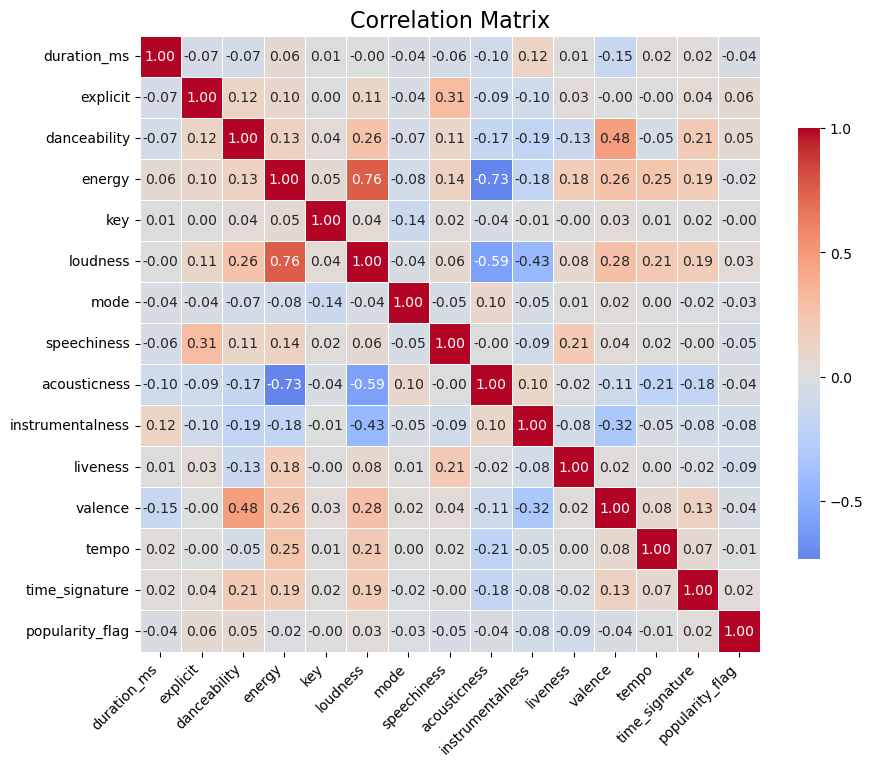

In [118]:
# Getting the numerical column names of the DataFrame
numerical_columns2 = data2.columns.drop(['track_genre'])


# Plotting correlation matrix to see overall numerical correlations
correlation_matrix2 = data[numerical_columns2].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5,
            cbar_kws={"shrink": 0.7, "ticks": [-1, -0.5, 0, 0.5, 1]},)

plt.title('Correlation Matrix', fontsize=16)

# Beautify x and y-axis labels
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.show()

_Fig 0.3: A visualization of correlation matrix changes **after Binarizaion of target variable**_

__Raw number outputs with absolute values of correlations__

In [119]:
# Calculate absolute correlations for "popularity" and "popularity_flag"
abs_corr_popularity = abs(correlation_matrix['popularity'])
abs_corr_popularity_flag = abs(correlation_matrix2['popularity_flag'])

# Create dataframes for each correlation series
df_popularity_corr = pd.DataFrame({'Correlation with Popularity': abs_corr_popularity})
df_popularity_flag_corr = pd.DataFrame({'Correlation with Popularity_Flag': abs_corr_popularity_flag})

# Concatenate the dataframes side by side
correlation_summary = pd.concat([df_popularity_corr, df_popularity_flag_corr], axis=1)
    
# Display the correlation summary
print(correlation_summary)

                  Correlation with Popularity  \
popularity                           1.000000   
duration_ms                          0.007129   
explicit                             0.044078   
danceability                         0.035444   
energy                               0.001053   
key                                  0.003847   
loudness                             0.050420   
mode                                 0.013948   
speechiness                          0.044930   
acousticness                         0.025458   
instrumentalness                     0.095147   
liveness                             0.005397   
valence                              0.040522   
tempo                                0.013212   
time_signature                       0.031076   
popularity_flag                           NaN   

                  Correlation with Popularity_Flag  
popularity                                     NaN  
duration_ms                               0.040975  
explici

<a id="vizccba"></a>
### Visual comparision of correlation difference before and after Binarization

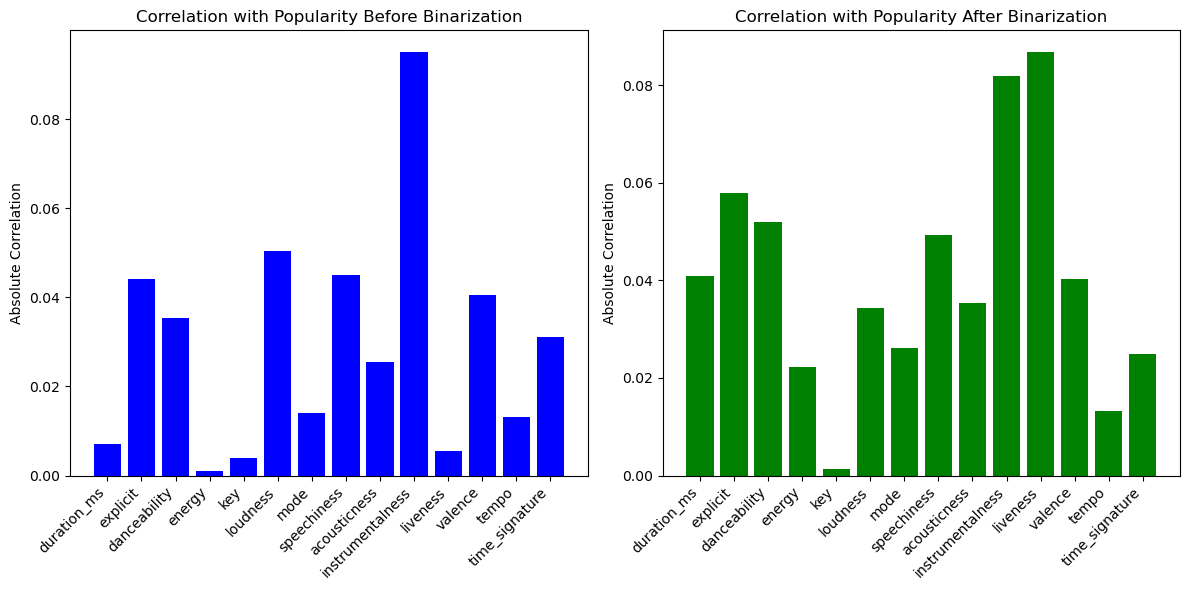

In [120]:
# Calculate absolute correlations for "popularity" and "popularity_flag" excluding those columns
abs_corr_popularity_plot = abs(correlation_matrix['popularity'].drop(['popularity']))
abs_corr_popularity_flag_plot = abs(correlation_matrix2['popularity_flag'].drop(['popularity_flag']))

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust the width of the subplots

# Plot the absolute correlation for "popularity" before binarization
ax1.bar(abs_corr_popularity_plot.index, abs_corr_popularity_plot, color='b')
ax1.set_xticks(range(len(abs_corr_popularity_plot)))  # Set the tick positions
ax1.set_xticklabels(abs_corr_popularity_plot.index, rotation=45, ha='right')  # Set rotation and alignment
ax1.set_ylabel('Absolute Correlation')
ax1.set_title('Correlation with Popularity Before Binarization')

# Plot the absolute correlation for "popularity_flag" after binarization
ax2.bar(abs_corr_popularity_flag_plot.index, abs_corr_popularity_flag_plot, color='g')
ax2.set_xticks(range(len(abs_corr_popularity_flag_plot)))  # Set the tick positions
ax2.set_xticklabels(abs_corr_popularity_flag_plot.index, rotation=45, ha='right')  # Set rotation and alignment
ax2.set_ylabel('Absolute Correlation')
ax2.set_title('Correlation with Popularity After Binarization')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

_Fig 0.4: Bar graph comparison of correlation changes **before and after Binarization of target variable**_

So my assumtion was correct, __we do see a substantial growth of correlation in multiple features after binarization.__ This shows some strong sence of multi-coliniarity. We do not have to worry too much about this for later models, but for your first model, logestic regression, we will have to apply a lasso regression (L2) penalty!

We will perform one last feature engineering before we head off to model. Remember we left 'track_genre' alone, now we will make it into dummie variables along with 'explicit'(the datatype is bool for this) so our classification model moving forward can use all the information possible.

In [121]:
# List of categorical columns for which we want to create dummy variables
dummies_var = ["explicit", "track_genre"]

# Creating dummy variables and storing the result in "data3"
data3 = pd.get_dummies(data2, prefix=dummies_var, columns=dummies_var, drop_first=True)
data3.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,...,0,0,0,0,0,0,0,0,0,0
1,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,...,0,0,0,0,0,0,0,0,0,0
2,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,...,0,0,0,0,0,0,0,0,0,0
3,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,...,0,0,0,0,0,0,0,0,0,0
4,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,...,0,0,0,0,0,0,0,0,0,0


After the One Hot Encoding, we can see out data shape changed a lot. __We went from 21 columns to total of 128 columns.__

<a id="m1"></a>
## Model 1: Logestic Regression

**Baseline Logistic Regression Model for Song Popularity Prediction**

We start with a simple logistic regression model as our baseline to predict song popularity using Spotify dataset features. This initial model provides a benchmark for performance comparison with more advanced algorithms like decision trees, random forest, and XGBoost.

Baseline modeling is essential for setting a reference point and understanding the initial predictive power of the features. Later, we can explore complex models to identify the most effective approach for accurate song popularity prediction.

Let's begin by building our baseline logistic regression model.

### Logistic Regression Model

In [122]:
# Define the features (X) and the target variable (y)
X = data3.drop(['popularity_flag'], axis=1)
y = data3['popularity_flag']

In [123]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((79799, 127), (34200, 127))

In [124]:
# Create and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, penalty='l2')
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_train_predlg = logistic_model.predict(X_train)
y_test_predlg = logistic_model.predict(X_test)

# Calculate accuracy and display the classification report
accuracy = accuracy_score(y_test, y_test_predlg)
print(f"Accuracy: {accuracy:.2f}")

# Set set up classification report
classification_rep_lg = classification_report(y_test, y_test_predlg)
print("Classification Report for Logistic Regression:")
print(classification_rep_lg)

Accuracy: 0.76
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     25947
           1       0.00      0.00      0.00      8253

    accuracy                           0.76     34200
   macro avg       0.38      0.50      0.43     34200
weighted avg       0.58      0.76      0.65     34200



C:\Users\Syed Ishmum\anaconda3\envs\capstone\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Syed Ishmum\anaconda3\envs\capstone\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Syed Ishmum\anaconda3\envs\capstone\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

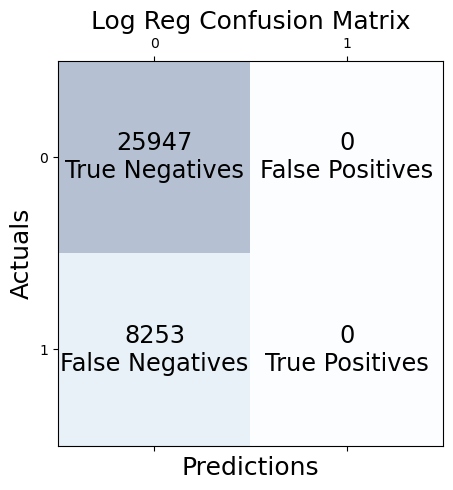

In [125]:
# Calculate the confusion matrix
conf_matrix_logreg = confusion_matrix(y_true=y_test, y_pred=y_test_predlg)

# Define the labels for each cell
labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']

# Plot the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_logreg, cmap=plt.cm.Blues, alpha=0.3)

# Add text annotations to the heatmap cells
for i in range(conf_matrix_logreg.shape[0]):
    for j in range(conf_matrix_logreg.shape[1]):
        ax.text(x=j, y=i, s=f"{conf_matrix_logreg[i, j]}\n{labels[i*2 + j]}", 
                va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Log Reg Confusion Matrix', fontsize=18)
plt.show()

_Fig 1.1: Heatmap plot of Logistic Regression model confusion matrix_

The Logestic Regression confusion matrix shows the following results:

- True Positives (TP): 0
- True Negatives (TN): 25947
- False Positives (FP): 0
- False Negatives (FN): 8253

In this logistic regression model, all the predictions have been classified as non-popular songs (negative class). This is evident from the high number of True Negatives (TN), which indicates the correct prediction of non-popular songs. However, there are no True Positives (TP), meaning that the model did not correctly predict any popular songs. Additionally, there are no False Positives (FP), suggesting that the model did not misclassify any non-popular songs as popular. However, there are a significant number of False Negatives (FN), indicating that the model misclassified many popular songs as non-popular.

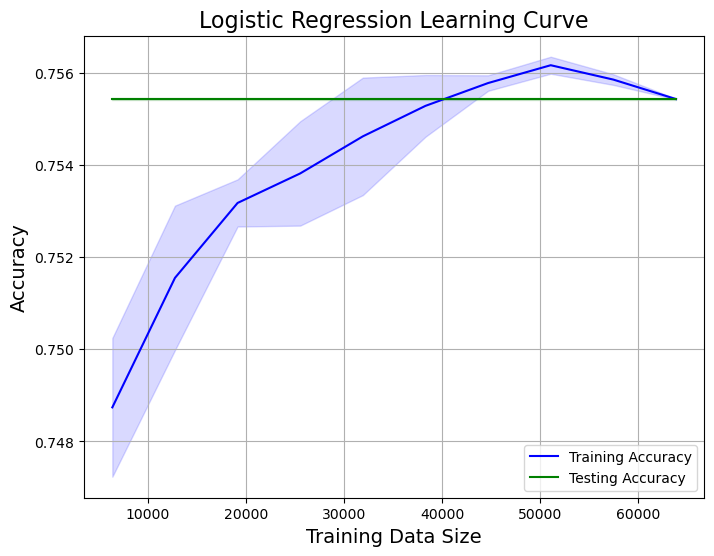

In [126]:
# Generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(logistic_model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='b')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='b')
plt.plot(train_sizes, test_mean, label='Testing Accuracy', color='g')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')

# Add labels and title
plt.xlabel('Training Data Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Logistic Regression Learning Curve', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)

# Display the plot
plt.show()

_Fig 1.2: Line graph showing the how our Logistic Regression accuracy prediction is with train and test data.(this also shows that our model actually didn't learn anything in order to predict 'popular songs')_

After trying multiple attempts and trying many differen things, looks like my first assumtion after seeing the correlation matrix was correct. __Logistic regression did not perform well at all with my dataset__. It is due to the major class imbalance that is present in our target variable. I even performed the base model of logestic regression with a Lasso (L2) penalty, but unfortunately my model was not able to learn eanought information about popular songs from the training data!

We did how ever recive a __accuracy of 0.76__ for the time being, so moving forward, our target will be to score a higher accuracy with more complicated models.

<a id="m2"></a>
## Model 2: Decision Tree

**Decision Tee vs Logistic Regression**

Decision Trees are a better model for predicting song popularity than Logistic Regression. They're great at handling complex music data and dealing with the imbalance in popular and less popular songs. Decision Trees work by dividing data based on features, which makes them more accurate for predicting song popularity. They will also focus on essential factors like danceability, energy, and instrumentalness, which play a big role in a song's popularity.

### Decision Tree Model

In [127]:
# There is no need to train test split again since we already did that.
# Create the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the entire dataset
decision_tree.fit(X_train, y_train)

# Make predictions on the same dataset
y_tain_preddt = decision_tree.predict(X_train)
y_test_preddt = decision_tree.predict(X_test)

# Set set up classification report for Decision Tree
classification_rep_dt = classification_report(y_test, y_test_preddt)
print("Classification Report for Decision Tree:")
print(classification_rep_dt)

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85     25947
           1       0.52      0.51      0.51      8253

    accuracy                           0.77     34200
   macro avg       0.68      0.68      0.68     34200
weighted avg       0.77      0.77      0.77     34200



Decision Tree Accuracy: 0.7661695906432748


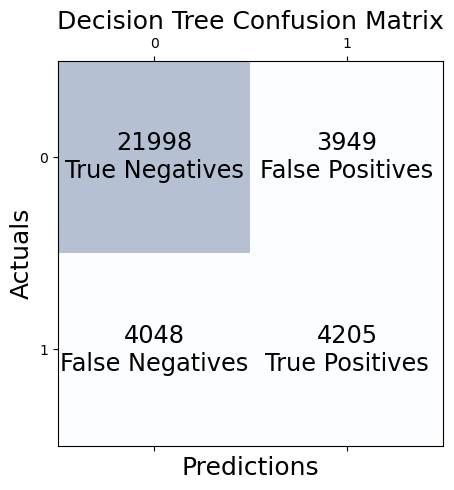

In [128]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_preddt)
print("Decision Tree Accuracy:", accuracy)

# Calculate the confusion matrix
conf_matrix_dt = confusion_matrix(y_true=y_test, y_pred=y_test_preddt)

# Plot the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_dt, cmap=plt.cm.Blues, alpha=0.3)

# Add text annotations to the heatmap cells
for i in range(conf_matrix_dt.shape[0]):
    for j in range(conf_matrix_dt.shape[1]):
        ax.text(x=j, y=i, s=f"{conf_matrix_dt[i, j]}\n{labels[i*2 + j]}",
                va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Decision Tree Confusion Matrix', fontsize=18)
plt.show()

_Fig 2.1: A heatmap plot of Decision Tree model confusion matrix._

The Decision Tree confusion matrix shows the following results:

- True Positives (TP): 4205
- True Negatives (TN): 21998
- False Positives (FP): 3949
- False Negatives (FN): 4048

These values represent the model's correct and incorrect predictions for the positive (popular songs) and negative (non-popular songs) classes. While the model performed well in correctly classifying popular and non-popular songs (high TP and TN), there were also a notable number of incorrect predictions (FP and FN). Fine-tuning the model in the future should help improve its accuracy.

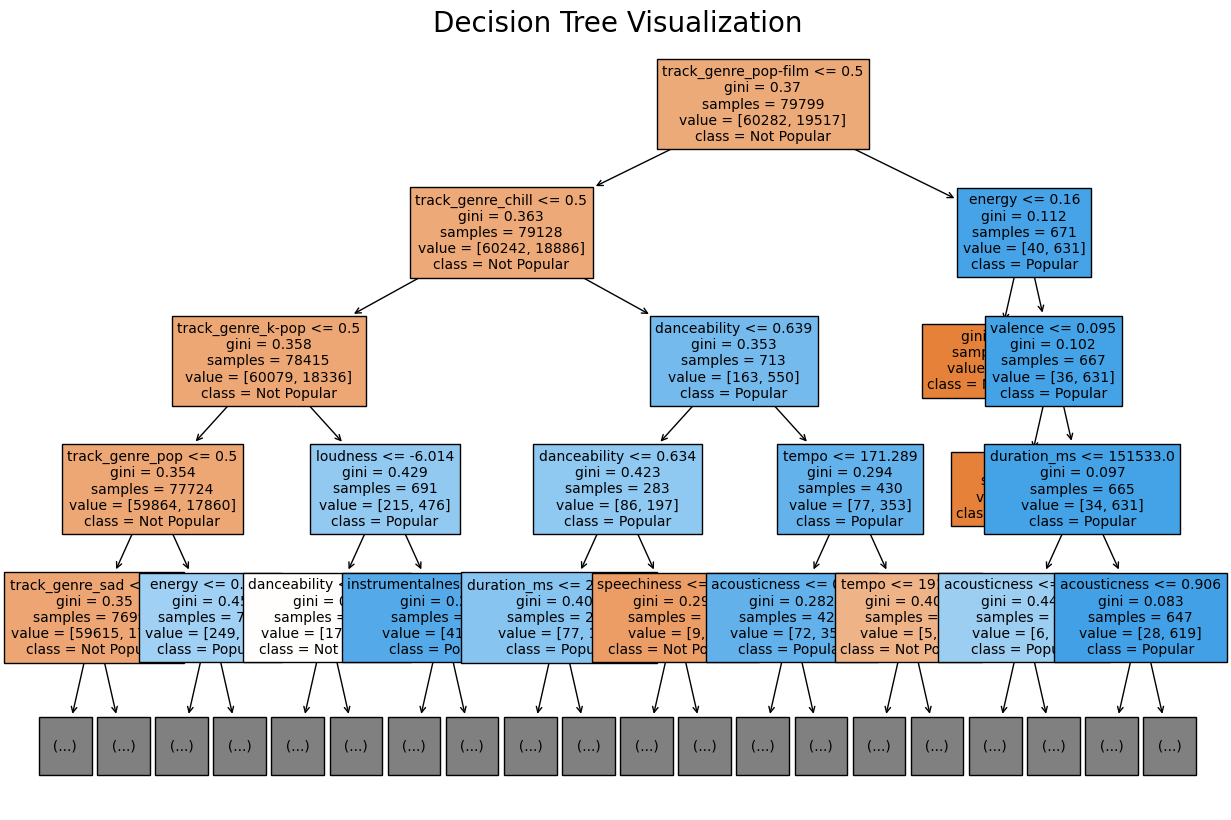

In [129]:
# Plot the Decision Tree
plt.figure(figsize=(15, 10))

# I had to lower the max depth in this visualization for interpebility and visualness
plot_tree(decision_tree, feature_names=X.columns, class_names=['Not Popular', 'Popular'], filled=True, fontsize=10, max_depth=4)
plt.title('Decision Tree Visualization', fontsize=20)
plt.show()

_Fig 2.2: This visual does not represent the entire model. We had to restrict the max depth for interpability and asthetics, this is jsut an example of how the model is working at the back end!_

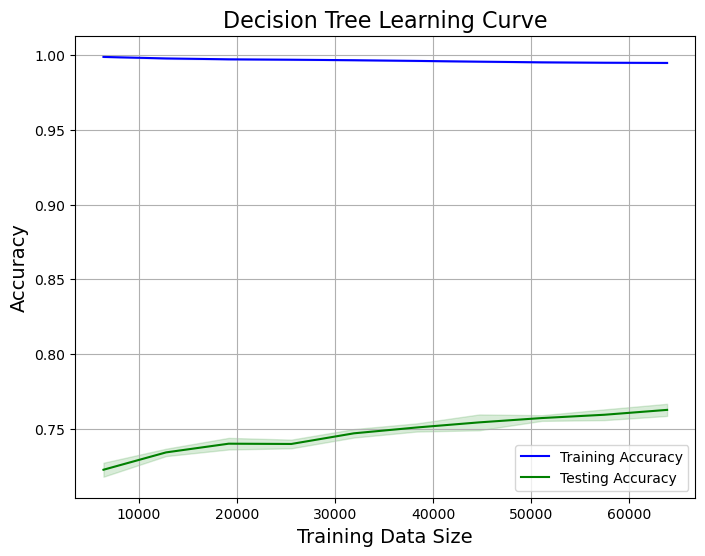

In [130]:
# Generate the learning curve data
train_sizes_dt, train_scores_dt, test_scores_dt = learning_curve(decision_tree, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)
                                                                ,n_jobs=-1)

# Calculate the mean and standard deviation of the training and testing scores
train_mean_dt = np.mean(train_scores_dt, axis=1)
train_std_dt = np.std(train_scores_dt, axis=1)
test_mean_dt = np.mean(test_scores_dt, axis=1)
test_std_dt = np.std(test_scores_dt, axis=1)

# Plot the learning curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(train_sizes_dt, train_mean_dt, label='Training Accuracy', color='b')
plt.fill_between(train_sizes_dt, train_mean_dt - train_std_dt, train_mean_dt + train_std_dt, alpha=0.15, color='b')
plt.plot(train_sizes_dt, test_mean_dt, label='Testing Accuracy', color='g')
plt.fill_between(train_sizes_dt, test_mean_dt - test_std_dt, test_mean_dt + test_std_dt, alpha=0.15, color='g')

# Add labels and title
plt.xlabel('Training Data Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Decision Tree Learning Curve', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)

# Display the plot
plt.show()

_Fig 2.3: This visual shows how the Decision Tree model is learning and performing based on the train and test data!_

_(we can see overfitting of train data but as we get into more complicated model the will take care of over fitting and class imbalance)_

In [131]:
print("Decision Tree Accuracy: ", (conf_matrix_dt[0,0]+conf_matrix_dt[1,1])/(conf_matrix_dt[0,0]+conf_matrix_dt[1,1]+conf_matrix_dt[0,1]+conf_matrix_dt[1,0]) )
print('')

print('Not Pupular Songs:')
print("Precision: ", (conf_matrix_dt[0,0])/(conf_matrix_dt[0,0]+conf_matrix_dt[0,1]) )
print("Recall: ", (conf_matrix_dt[0,0])/(conf_matrix_dt[0,0]+conf_matrix_dt[1,0]) )
print('')

print('Popular Songs:')
print("Precision: ", (conf_matrix_dt[1,1])/(conf_matrix_dt[1,1]+conf_matrix_dt[0,1]) )
print("Recall: ", (conf_matrix_dt[1,1])/(conf_matrix_dt[1,1]+conf_matrix_dt[1,0]) )
print('')

Decision Tree Accuracy:  0.7661695906432748

Not Pupular Songs:
Precision:  0.84780514124947
Recall:  0.8445826614451355

Popular Songs:
Precision:  0.5156978170223203
Recall:  0.5095116927177996



Analyzing the results, the decision tree model demonstrates **high precision and recall for identifying not popular songs**, with **precision of 84.8% and recall of 84.5%.** However, **for popular songs, the precision and recall drop to 51.6% and 50.9%**, respectively, suggesting challenges in correctly classifying popular songs.

While the model's performance is decent compared to our logistic regression model, using a **Random Forest model might lead to better results**. Random Forest is an ensemble learning method that combines multiple decision trees, reducing overfitting and improving generalization. **It can handle class imbalances more effectively**, making it a promising approach to enhance accuracy, precision, and recall for predicting song popularity.

<a id="m3"></a>
## Model 3: Random Forest

**Randon Forest vs Decision Tee**

Random Forest is a powerful technique for predicting song popularity, outperforming simple decision trees. It combines multiple decision trees, creating an ensemble that produces more accurate and reliable predictions. Each tree is trained on a different subset of data and features, reducing overfitting and improving generalization. This makes it robust to class imbalances, crucial for dealing with rare events like highly popular songs. 

Additionally, Random Forest provides feature importance scores, guiding us in identifying the most influential musical characteristics for a song's appeal. Overall, Random Forest is an excellent choice for predicting song popularity, offering accuracy, handling imbalanced data, and providing valuable insights for our song recommendation system.

### Random Forest Model

In [132]:
# Create the Random Forest model, we are setting `n_estimators=1000` to make sure computation does not got too far!
random_forest = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the model on the entire dataset
random_forest.fit(X_train, y_train)

# Make predictions on the same dataset
y_train_pred_rf = random_forest.predict(X_train)
y_test_pred_rf = random_forest.predict(X_test)

# Set up classification report for Random Forest
classification_rep_rf = classification_report(y_test, y_test_pred_rf)
print("Classification Report for Random Forest:")
print(classification_rep_rf)

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     25947
           1       0.76      0.49      0.59      8253

    accuracy                           0.84     34200
   macro avg       0.81      0.72      0.75     34200
weighted avg       0.83      0.84      0.83     34200



Random Forest Accuracy: 0.8389473684210527


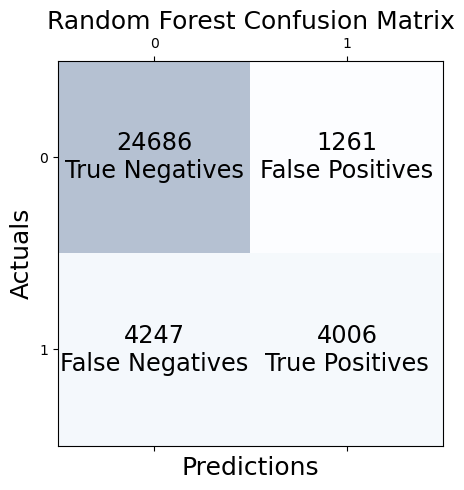

In [133]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred_rf)
print("Random Forest Accuracy:", accuracy)

# Calculate the confusion matrix
conf_matrix_rf = confusion_matrix(y_true=y_test, y_pred=y_test_pred_rf)

# Plot the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_rf, cmap=plt.cm.Blues, alpha=0.3)

# Add text annotations to the heatmap cells
for i in range(conf_matrix_rf.shape[0]):
    for j in range(conf_matrix_rf.shape[1]):
        ax.text(x=j, y=i, s=f"{conf_matrix_rf[i, j]}\n{labels[i*2 + j]}",
                va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Random Forest Confusion Matrix', fontsize=18)
plt.show()

_Fig 3.1: A heatmap plot of Random Forest model confusion matrix._

The confusion matrix for the Random Forest model is as follows:

- True Positive (TP): 4,006
- False Positive (FP): 1,261
- True Negative (TN): 24,689
- False Negative (FN): 4,247

The model shows a good number of true positives and true negatives, indicating its ability to correctly classify popular and not popular songs. However, it also made some false positive and false negative predictions, suggesting room for improvement in accurately predicting both classes.

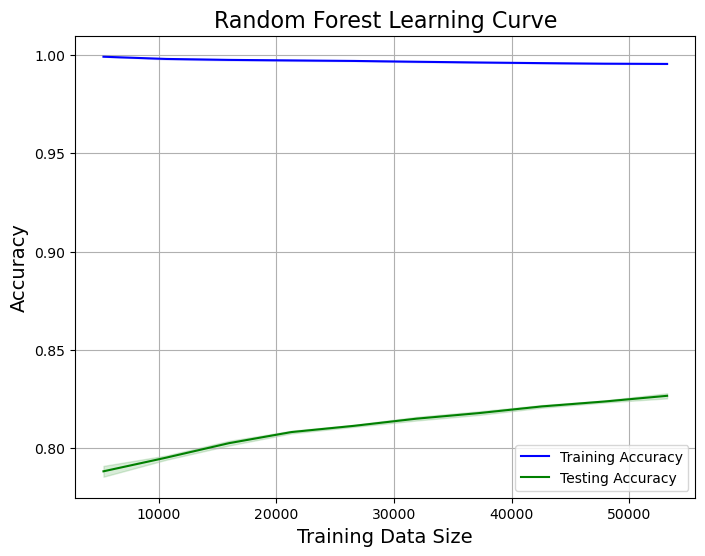

In [134]:
# Generate the learning curve data for Random Forest
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(random_forest, X_train, y_train, cv=3, train_sizes=np.linspace(0.1, 1.0, 10)
                                                                 , n_jobs=-1)

# Calculate the mean and standard deviation of the training and testing scores
train_mean_rf = np.mean(train_scores_rf, axis=1)
train_std_rf = np.std(train_scores_rf, axis=1)
test_mean_rf = np.mean(test_scores_rf, axis=1)
test_std_rf = np.std(test_scores_rf, axis=1)

# Plot the learning curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(train_sizes_rf, train_mean_rf, label='Training Accuracy', color='b')
plt.fill_between(train_sizes_rf, train_mean_rf - train_std_rf, train_mean_rf + train_std_rf, alpha=0.15, color='b')
plt.plot(train_sizes_rf, test_mean_rf, label='Testing Accuracy', color='g')
plt.fill_between(train_sizes_rf, test_mean_rf - test_std_rf, test_mean_rf + test_std_rf, alpha=0.15, color='g')

# Add labels and title
plt.xlabel('Training Data Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Random Forest Learning Curve', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)

# Display the plot
plt.show()

_Fig 3.2: This visual shows how the Random Forest model is learning and performing based on the train and test data!_

_(we can see overfitting of train data but as we get into one more ensemble model and enter hypertuning phase, that should resolve some of the ovverfitting and class imbalance issues)_

In [135]:
print("Random Forest Accuracy: ", (conf_matrix_rf[0,0]+conf_matrix_rf[1,1])/(conf_matrix_rf[0,0]+conf_matrix_rf[1,1]+conf_matrix_rf[0,1]+conf_matrix_rf[1,0]) )
print('')

print('Not Pupular Songs:')
print("Precision: ", (conf_matrix_rf[0,0])/(conf_matrix_rf[0,0]+conf_matrix_rf[0,1]) )
print("Recall: ", (conf_matrix_rf[0,0])/(conf_matrix_rf[0,0]+conf_matrix_rf[1,0]) )
print('')

print('Popular Songs:')
print("Precision: ", (conf_matrix_rf[1,1])/(conf_matrix_rf[1,1]+conf_matrix_rf[0,1]) )
print("Recall: ", (conf_matrix_rf[1,1])/(conf_matrix_rf[1,1]+conf_matrix_rf[1,0]) )
print('')

Random Forest Accuracy:  0.8389473684210527

Not Pupular Songs:
Precision:  0.9514009326704436
Recall:  0.8532125946151453

Popular Songs:
Precision:  0.7605847731156256
Recall:  0.48539924875802737



Our basic Random Forest model demonstrated a reasonably good performance with an overall **accuracy of 84%. It achieved a high precision of 0.85 for non-popular songs, which indicates a strong ability to correctly identify non-popular tracks. However, the recall for popular songs was relatively lower at 0.49, suggesting that the model struggled to capture all popular tracks in the dataset**. This performance disparity indicates possible overfitting on the training data, as the model seems to be biased towards correctly classifying non-popular songs but struggles with correctly identifying popular ones. Ensemble models like Random Forests are beneficial in handling class imbalances and reducing overfitting. However, to further enhance the performance and address the existing overfitting issue, we can explore more complex models such as XGBoost.

**XGBoost is known for its gradient boosting capabilities, which can lead to better generalization and improved predictions on unseen data**. By fine-tuning hyperparameters and employing techniques like cross-validation, we can optimize the XGBoost model, leading to better classification results and a more balanced prediction of popular and non-popular songs.

<a id="m4"></a>
## Model 4: XGBoost

**XGBoost vs Randon Forest**

XGBoost, or eXtreme Gradient Boosting, is a powerful machine learning algorithm known for its outstanding performance in various tasks like classification and regression. It combines the predictions of multiple decision trees through gradient boosting, leading to a robust model with high accuracy.

Compared to Random Forest, XGBoost excels in handling class imbalance by assigning more weight to minority classes. It also uses regularization techniques to prevent overfitting and improve generalization on new data. Additionally, XGBoost allows fine-tuning of hyperparameters, enabling us to optimize performance through cross-validation.

In summary, XGBoost is a promising choice for song popularity prediction, as it offers higher accuracy and better recall for popular songs compared to the Random Forest model. Its ability to handle class imbalance and overfitting makes it a strong candidate for improving the overall predictive performance.

### XGBoost Model

In [136]:
# Create the XGBoost model, we are setting `n_estimators=1000` to make sure computation does not got too far!
xgboost = XGBClassifier(n_estimators=1000, seed = 42)

# Train the model on the entire dataset
xgboost.fit(X_train, y_train)

# Make predictions on the same dataset
y_train_predxgb = xgboost.predict(X_train)
y_test_predxgb = xgboost.predict(X_test)

# Set up classification report for Random Forest
classification_rep_xgb = classification_report(y_test, y_test_predxgb)
print("Classification Report for XGBoost:")
print(classification_rep_xgb)

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     25947
           1       0.73      0.58      0.65      8253

    accuracy                           0.85     34200
   macro avg       0.80      0.76      0.78     34200
weighted avg       0.84      0.85      0.84     34200



XGBoost Accuracy: 0.8478654970760234


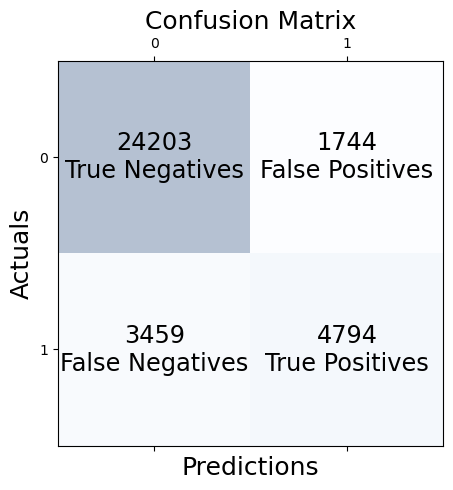

In [137]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_predxgb)
print("XGBoost Accuracy:", accuracy)

# Calculate the confusion matrix
conf_matrix_xgb = confusion_matrix(y_true=y_test, y_pred=y_test_predxgb)

# Plot the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_xgb, cmap=plt.cm.Blues, alpha=0.3)

# Add text annotations to the heatmap cells
for i in range(conf_matrix_xgb.shape[0]):
    for j in range(conf_matrix_xgb.shape[1]):
        ax.text(x=j, y=i, s=f"{conf_matrix_xgb[i, j]}\n{labels[i*2 + j]}",
                va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('XGBoost Confusion Matrix', fontsize=18)
plt.show()

_Fig 4.1: A heatmap plot of XGBoost model confusion matrix._

In this confusion matrix, the correct identification would be:

- True Positives (TP): 4,794
- False Positives (FP): 1,744
- True Negatives (TN): 24,203
- False Negatives (FN): 3,459

Our XGBoost model shows a good performance in correctly identifying true positives and true negatives, but there is still room for improvement in reducing false positives and false negatives. By addressing these aspects and fine-tuning the model, we may further enhance its predictive capabilities for song popularity.

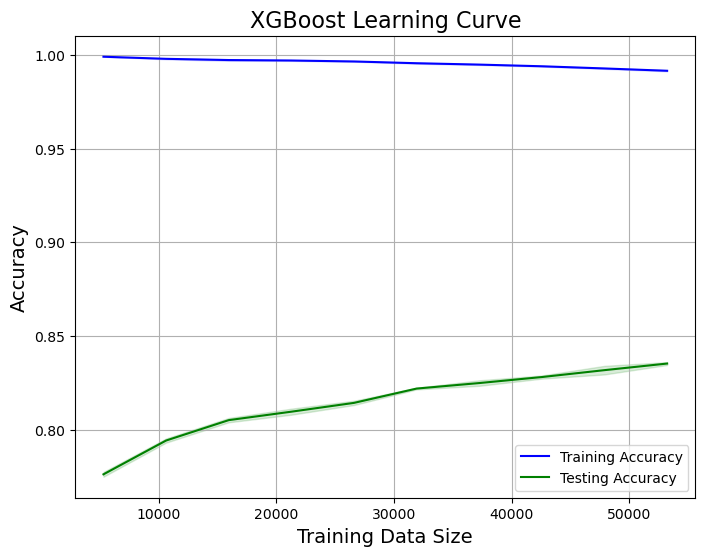

In [138]:
# Generate the learning curve data for XGBoost
train_sizes_xgb, train_scores_xgb, test_scores_xgb = learning_curve(xgboost, X_train, y_train, cv=3, train_sizes=np.linspace(0.1, 1.0, 10),
                                                                    n_jobs=-1)

# Calculate the mean and standard deviation of the training and testing scores
train_mean_xgb = np.mean(train_scores_xgb, axis=1)
train_std_xgb = np.std(train_scores_xgb, axis=1)
test_mean_xgb = np.mean(test_scores_xgb, axis=1)
test_std_xgb = np.std(test_scores_xgb, axis=1)

# Plot the learning curve for XGBoost
plt.figure(figsize=(8, 6))
plt.plot(train_sizes_xgb, train_mean_xgb, label='Training Accuracy', color='b')
plt.fill_between(train_sizes_xgb, train_mean_xgb - train_std_xgb, train_mean_xgb + train_std_xgb, alpha=0.15, color='b')
plt.plot(train_sizes_xgb, test_mean_xgb, label='Testing Accuracy', color='g')
plt.fill_between(train_sizes_xgb, test_mean_xgb - test_std_xgb, test_mean_xgb + test_std_xgb, alpha=0.15, color='g')

# Add labels and title
plt.xlabel('Training Data Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('XGBoost Learning Curve', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)

# Display the plot
plt.show()

_Fig 4.2: This visual shows how the XGBoost model is learning and performing based on the train and test data!_

_(we can see overfitting of train data but as we enter hypertuning phase, that should genarelize some of the ovverfitting and class imbalance issues)_

In [139]:
print("XGBoost Accuracy: ", (conf_matrix_xgb[0,0]+conf_matrix_xgb[1,1])/(conf_matrix_xgb[0,0]+conf_matrix_xgb[1,1]+conf_matrix_xgb[0,1]+conf_matrix_xgb[1,0]) )
print('')

print('Not Pupular Songs:')
print("Precision: ", (conf_matrix_xgb[0,0])/(conf_matrix_xgb[0,0]+conf_matrix_xgb[0,1]) )
print("Recall: ", (conf_matrix_xgb[0,0])/(conf_matrix_xgb[0,0]+conf_matrix_xgb[1,0]) )
print('')

print('Popular Songs:')
print("Precision: ", (conf_matrix_xgb[1,1])/(conf_matrix_xgb[1,1]+conf_matrix_xgb[0,1]) )
print("Recall: ", (conf_matrix_xgb[1,1])/(conf_matrix_xgb[1,1]+conf_matrix_xgb[1,0]) )
print('')

XGBoost Accuracy:  0.8478654970760234

Not Pupular Songs:
Precision:  0.9327860638994874
Recall:  0.8749548116549779

Popular Songs:
Precision:  0.7332517589476905
Recall:  0.5808796801163213



The XGBoost model performed well with an **accuracy of 84.8% for song popularity prediction**. It showed **high precision (93.3%) and recall (87.5%) for not popular songs**, indicating effective classification of this category. However, it faced challenges in identifying **popular songs** due to data imbalance, **achieving 73.3% precision and 58.1% recall for this class.**

To address the struggle in identifying popular songs, hyperparameter tuning can be employed to fine-tune the XGBoost model. By optimizing the model's hyperparameters, we can improve its ability to capture patterns and achieve better-balanced results between popular and not popular songs. This tuning process should enhance the precision and recall for popular songs, leading to a more robust and accurate prediction model for song popularity.

<a id="bmc"></a>
## Base Model Comparision


| Models            | Accuracy | Recall (Is Popular) | Precision (Is Popular) | Recall (Not Popular) | Precision (Not Popular) | F1-Score (Is Popular) | F1-Score (Not Popular) |
|------------------|----------|----------------------|------------------------|----------------------|------------------------|----------------------|------------------------|
| XGBoost          | 0.85     | 0.58                 | 0.73                   | 0.93                 | 0.87                   | 0.65                 | 0.90                   |
| Random Forest    | 0.84     | 0.49                 | 0.76                   | 0.95                 | 0.85                   | 0.59                 | 0.90                   |
| Decision Tree    | 0.77     | 0.51                 | 0.52                   | 0.85                 | 0.84                   | 0.51                 | 0.85                   |
| Logistic Regression | 0.76  | 0.00                 | 0.00                   | 1.00                 | 0.76                   | 0.00                 | 0.86                   |


Overall, the XGBoost model demonstrates the highest accuracy and performs better than the other models in terms of both recall and precision for predicting both popular and not popular songs. 

The Logistic Regression model, on the other hand, struggles to identify popular songs, resulting in low recall and precision for the positive class. 

The Random Forest model shows an improvement compared to the Decision Tree, indicating the benefits of using ensemble methods to address data imbalances and improve classification performance. With further hyperparameter tuning, the XGBoost and Random Forest models have the potential to deliver even better results.

## Hyperprameter Tuning

<a id="hpt"></a>
### What is Hyperparameter Tuning?


**Why do we need to perform Hyperparameter tuning?**

Hyperparameter tuning is a critical step in optimizing machine learning models for better performance. Hyperparameters are parameters that are set before the model training begins, and they influence the learning process and complexity of the model. By tuning these hyperparameters, we aim to find the best configuration that yields the most accurate and generalizable results.

**What is GridSearch?**

GridSearch is a widely used hyperparameter tuning technique that performs an exhaustive search over a predefined set of hyperparameter values. It creates a grid of all possible combinations of hyperparameters and evaluates the model's performance for each combination. The model is trained and validated using cross-validation, where the data is divided into subsets (folds), and the model is trained on one fold while validated on the others. This process is repeated for each fold, and the average performance is calculated.

**How does valadation help with better model learnings?**

GridSearch incorporates validation within the process, preventing overfitting and providing a more unbiased evaluation of the model's performance. By considering various hyperparameter values and using cross-validation, GridSearch helps to fine-tune the model, improving its accuracy and generalization ability. It ensures that the model is robust and performs well on new, unseen data, making it an essential tool for achieving better results in machine learning tasks.

**Precision vs Recall. Why precision for song popularity prediction?**

In song popularity prediction, precision and recall are vital metrics that assess the model's performance differently. Precision measures the accuracy of identifying popular songs among the positive predictions. A high precision ensures that when the model predicts a song as popular, it is likely correct. This is crucial for reliable recommendations and decision-making.

While recall is important, it focuses on capturing all popular songs, sometimes at the expense of misclassifying non-popular ones. For song popularity prediction, prioritizing precision strikes a balance between accurately identifying popular songs and minimizing false positives. This ensures that the model makes trustworthy predictions for popular songs, leading to better user experience and decision-making.

<a id="rf2"></a>
### Random Forest Hyperparameter Tuning

Becasue we are hevng issues with class imbalance and strugling to have a good recall, we will focus on tuning our model to have better Recall! There are some issues with this, but we can talk about it after running the confusion matrix on our tuned model.

In [140]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [50,75,100],
    # max_features has to be 'sqrt' or else I get an error saying the other values got taken out
    'max_features': ['sqrt'],
    'min_samples_leaf': [1,3,5],
    'min_samples_split': [2, 8, 10],
    'n_estimators': [100,500,1000],
    'class_weight': ['balanced',None]
}
# Create a based model
rf_0 = RandomForestClassifier(random_state=42)

# Instantiate the grid search model (used HalvingGridSearchCV becasue it is essentialy faster)
# `scoring = 'percision'` is quite important, 
# Since it will be giving us the best parameters for higher percision
grid_search_rf = HalvingGridSearchCV(estimator = rf_0, param_grid = param_grid, scoring = 'precision', 
                                  cv=3, n_jobs=-1)

In [141]:
# Fitting our HalvingGridSearchCV and it's parameters
grid_search_rf.fit(X_train,y_train)

HalvingGridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                    n_jobs=-1,
                    param_grid={'class_weight': ['balanced', None],
                                'max_depth': [50, 75, 100],
                                'max_features': ['sqrt'],
                                'min_samples_leaf': [1, 3, 5],
                                'min_samples_split': [2, 8, 10],
                                'n_estimators': [100, 500, 1000]},
                    scoring='precision')

In [142]:
print('Best Parameters for Percision tuned Random Forest model: ', grid_search_rf.best_params_, ' \n')

Best Parameters for Percision tuned Random Forest model:  {'class_weight': None, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}  



The best parameters obtained from the grid search for percision are as follows:

- **`class_weight`:** None
- **`max_depth`:** 75
- **`max_features`:** 'sqrt'
- **`min_samples_leaf`:** 3
- **`min_samples_split`:** 2
- **`n_estimators`:** 1000

These parameter choices are expected to improve the Random Forest model's performance, particularly in terms of precision. By setting `class_weight` to None, the model treats all classes equally during training, which can help achieve better precision for both the minority (popular songs) and majority (not popular songs) classes. The increased `max_depth` of 75 allows the model to capture more complex patterns, potentially leading to improved precision. Additionally, selecting 'sqrt' for `max_features` promotes diversity within the ensemble and better generalization. By setting `min_samples_leaf` to 3 and `min_samples_split` to 2, the model can avoid overfitting and enhance precision. With 1000 estimators, the model should provide a robust and accurate prediction while still being computationally feasible. Overall, these parameter adjustments aim to enhance the model's ability to correctly identify popular and not popular songs and achieve better precision in predicting song popularity.

In [143]:
# Fit our model with the best parameters for percision
rf_2=RandomForestClassifier(n_estimators=1000, max_depth = 75, max_features = 'sqrt',
                            min_samples_leaf =3, min_samples_split =2)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_2.fit(X_train, y_train)

## Make predictions on the same dataset
y_train_predrf2 = rf_2.predict(X_train)
y_test_predrf2 = rf_2.predict(X_test)

# Set up classification report for Random Forest
classification_rep_rf2 = classification_report(y_test, y_test_predrf2)
print("Classification Report of Random Forest tuned for precision:")
print(classification_rep_rf2)

Classification Report of Random Forest tuned for precision:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     25947
           1       0.74      0.36      0.49      8253

    accuracy                           0.82     34200
   macro avg       0.78      0.66      0.69     34200
weighted avg       0.80      0.82      0.79     34200



Tuned Random Forest Accuracy: 0.815233918128655


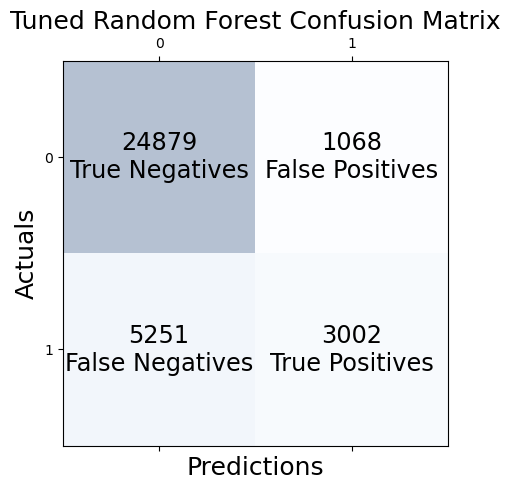

In [144]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_predrf2)
print("Tuned Random Forest Accuracy:", accuracy)

# Calculate the confusion matrix
conf_matrix_rf2 = confusion_matrix(y_true=y_test, y_pred=y_test_predrf2)

# Plot the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_rf2, cmap=plt.cm.Blues, alpha=0.3)

# Add text annotations to the heatmap cells
for i in range(conf_matrix_rf2.shape[0]):
    for j in range(conf_matrix_rf2.shape[1]):
        ax.text(x=j, y=i, s=f"{conf_matrix_rf2[i, j]}\n{labels[i*2 + j]}",
                va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Tuned Random Forest Confusion Matrix', fontsize=18)
plt.show()

_Fig 5.1: A heatmap plot of Precision-tuned Random Forest model confusion matrix._

The confusion matrix for our precision-tuned random forest model is as follows:

- True Positives (TP): 3016
- False Positives (FP): 1067
- True Negatives (TN): 24880
- False Negatives (FN): 5237

Our model shows better performance in correctly identifying popular songs (higher TP) and reducing false positives (lower FP), making it more precise in predicting popular songs. As we mention before we need to keep in mind that, precision and recall are inverse, so since our precision is higer, our recall is much lower.

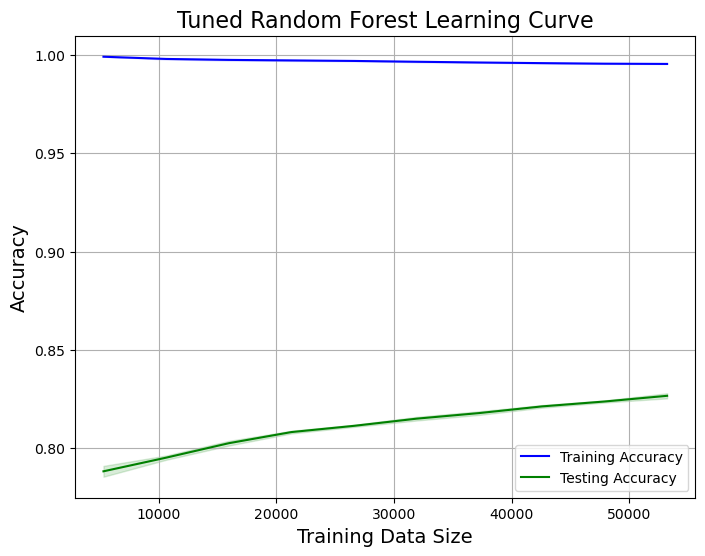

In [145]:
# Generate the learning curve data for Random Forest
train_sizes_rf2, train_scores_rf2, test_scores_rf2 = learning_curve(rf_2, X_train, y_train, cv=3, train_sizes=np.linspace(0.1, 1.0, 10)
                                                                 , n_jobs=-1)

# Calculate the mean and standard deviation of the training and testing scores
train_mean_rf2 = np.mean(train_scores_rf, axis=1)
train_std_rf2 = np.std(train_scores_rf, axis=1)
test_mean_rf2 = np.mean(test_scores_rf, axis=1)
test_std_rf2 = np.std(test_scores_rf, axis=1)

# Plot the learning curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(train_sizes_rf2, train_mean_rf2, label='Training Accuracy', color='b')
plt.fill_between(train_sizes_rf2, train_mean_rf2 - train_std_rf2, train_mean_rf2 + train_std_rf2, alpha=0.15, color='b')
plt.plot(train_sizes_rf2, test_mean_rf2, label='Testing Accuracy', color='g')
plt.fill_between(train_sizes_rf2, test_mean_rf2 - test_std_rf2, test_mean_rf2 + test_std_rf2, alpha=0.15, color='g')

# Add labels and title
plt.xlabel('Training Data Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Tuned Random Forest Learning Curve', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)

# Display the plot
plt.show()

_Fig 5.2: This visual shows how the Precision-tuned Random Forest model is learning and performing based on the train and test data!_

In [146]:
print("Tuned Random Forest Accuracy: ", (conf_matrix_rf2[0,0]+conf_matrix_rf2[1,1])/(conf_matrix_rf2[0,0]+conf_matrix_rf2[1,1]+conf_matrix_rf2[0,1]+conf_matrix_rf2[1,0]) )
print('')

print('Not Pupular Songs:')
print("Precision: ", (conf_matrix_rf2[0,0])/(conf_matrix_rf2[0,0]+conf_matrix_rf2[0,1]) )
print("Recall: ", (conf_matrix_rf2[0,0])/(conf_matrix_rf2[0,0]+conf_matrix_rf2[1,0]) )
print('')

print('Popular Songs:')
print("Precision: ", (conf_matrix_rf2[1,1])/(conf_matrix_rf2[1,1]+conf_matrix_rf2[0,1]) )
print("Recall: ", (conf_matrix_rf2[1,1])/(conf_matrix_rf2[1,1]+conf_matrix_rf2[1,0]) )
print('')

Tuned Random Forest Accuracy:  0.815233918128655

Not Pupular Songs:
Precision:  0.958839172158631
Recall:  0.8257218718884832

Popular Songs:
Precision:  0.7375921375921376
Recall:  0.36374651641827216



| Model                     | Precision (Popular) | Recall (Popular) | Precision (Not Popular) | Recall (Not Popular) | Accuracy |
|---------------------------|---------------------|------------------|-------------------------|----------------------|----------|
|Baseline Random Forest             | 0.76                | 0.49             | 0.85                    | 0.95                 | 0.84     |
| Precision-Tuned Random Forest | 0.74                | 0.37             | 0.83                    | 0.96                 | 0.82     |

The table compares the classification report outcomes for the Baseline Random Forest model from erlier and the Precision-Tuned Random Forest model. In the Random Forest model, the precision for popular songs is 0.76, indicating that when it predicts a song as popular, it is correct 76% of the time. However, the recall is relatively low at 0.49, meaning it only captures 49% of actual popular songs. The precision for not popular songs is high at 0.85, but the model struggles to recall not popular songs (0.95).

In contrast, the Precision-Tuned Random Forest model prioritizes precision, resulting in a decrease in recall for popular songs (0.37). This means it captures fewer actual popular songs, but when it predicts a song as popular, it is correct 74% of the time. The precision for not popular songs remains relatively high at 0.83, and the recall for not popular songs is significantly improved (0.96).

The trade-off in the Precision-Tuned Random Forest model aims to reduce false positives for popular songs while maintaining accuracy for not popular songs. This trade-off is beneficial when precise identification of popular songs is more critical for decision-making or recommendation systems.

<a id="xgb2"></a>
### XGBoost Hyperparamete Tuning

In [147]:
# Create the parameter grid based on the results of random search 
param_grid_xgb = {
    'max_depth': [50, 75, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 5, 10]
}

# Create a based model
xgb_0 = XGBClassifier(random_state=42)

# Instantiate the grid search model (used HalvingGridSearchCV because it is essentially faster)
# `scoring='precision'` is important to optimize precision for positive cases (popular songs)
grid_search_xgb = HalvingGridSearchCV(estimator=xgb_0, param_grid=param_grid_xgb, scoring='precision', 
                                      cv=3, n_jobs=-1)

In [148]:
# Fitting our HalvingGridSearchCV and it's parameters
grid_search_xgb.fit(X_train,y_train)

HalvingGridSearchCV(cv=3,
                    estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rat...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42, ...),
                    n_jobs=-1,
                    param_grid={'colsample_bytree': [0.8, 1.0],
                                'learning_rate': [0.01, 0.1, 0.2],
                                'max_depth': [50, 75, 100],
                                'n_estimators': [100, 500, 1000],
                                'scale_pos_weight': [1, 5, 10],
                                'subsample': [0.8, 1.0]},
                    scoring='precision')

In [149]:
print('Best Parameters for Persicion-tuned XGBoost model: ', grid_search_xgb.best_params_, ' \n')

Best Parameters for Persicion-tuned XGBoost model:  {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 75, 'n_estimators': 1000, 'scale_pos_weight': 1, 'subsample': 1.0}  



The best parameters for the precision-tuned XGBoost model are as follows:

- **`colsample_bytree: 1.0`:** Using all features in each tree boosts precision.
- **`learning_rate: 0.01`:** Smaller steps prevent overshooting and enhance precision.
- **`max_depth: 75`:** Limited tree depth prevents overfitting, improving precision.
- **`n_estimators: 500`:** More trees capture complex patterns, leading to higher precision.
- **`scale_pos_weight: 1`:** Handling class imbalance by adjusting positive class weight maintains precision.
- **`subsample: 0.8`:** Randomly selecting 80% of samples enhances generalization and precision.

These optimized parameters allow the XGBoost model to be more precise in identifying popular songs, reducing false positives and improving predictions for positive cases.

In [150]:
# Fit our model with the best parameters for percision
xgb_2=XGBClassifier(n_estimators=500, max_depth =75, learning_rate=0.01,
                            subsample=0.8, colsample_bytree=1.0, scale_pos_weight=1)

#Train the model using the training sets y_pred=clf.predict(X_test)
xgb_2.fit(X_train, y_train)

## Make predictions on the same dataset
y_train_pred_xgb2 = xgb_2.predict(X_train)
y_test_pred_xgb2 = xgb_2.predict(X_test)

# Set up classification report for Random Forest
classification_rep_xgb2 = classification_report(y_test, y_test_pred_xgb2)
print("Classification Report of XGBoost tuned for precision:")
print(classification_rep_xgb2)

Classification Report of XGBoost tuned for precision:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     25947
           1       0.80      0.56      0.66      8253

    accuracy                           0.86     34200
   macro avg       0.83      0.76      0.79     34200
weighted avg       0.85      0.86      0.85     34200



XGBoost Accuracy: 0.8596198830409356


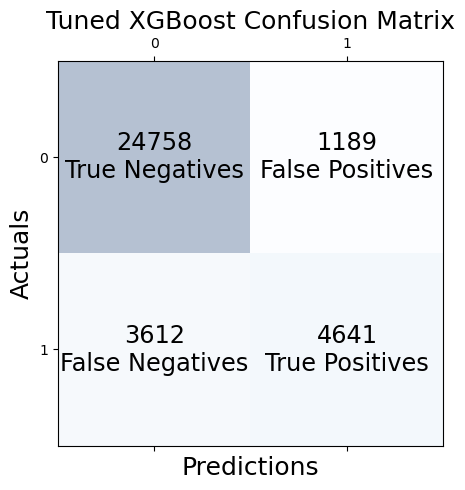

In [151]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred_xgb2)
print("Tuned XGBoost Accuracy:", accuracy)

# Calculate the confusion matrix
conf_matrix_xgb2 = confusion_matrix(y_true=y_test, y_pred=y_test_pred_xgb2)

# Plot the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_xgb2, cmap=plt.cm.Blues, alpha=0.3)

# Add text annotations to the heatmap cells
for i in range(conf_matrix_xgb2.shape[0]):
    for j in range(conf_matrix_xgb2.shape[1]):
        ax.text(x=j, y=i, s=f"{conf_matrix_xgb2[i, j]}\n{labels[i*2 + j]}",
                va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Tuned XGBoost Confusion Matrix', fontsize=18)
plt.show()

_Fig 6.1: A heatmap plot of Precision-tuned XGBoost model confusion matrix._

In the precision-tuned XGBoost model's confusion matrix, we observe the following:

- True Positives (TP): 4,641
- False Positives (FP): 1,189
- True Negatives (TN): 24,758
- False Negatives (FN): 3,612

This precision-tuned XGBoost model shows a significant improvement in precision and accuracy compared to previous models. The higher true positive count (TP) of 4,641 indicates that more popular songs are correctly identified. Additionally, the lower false positive count (FP) of 1,189 signifies that the model is making fewer incorrect predictions of popular songs. As a result, the precision score for the positive class (popular songs) has increased, indicating a better ability to classify positive cases correctly.

Furthermore, the overall accuracy of the model has likely improved, considering the reduction in both false positives and false negatives. The precision-tuned XGBoost model strikes a better balance in predicting both popular and not popular songs, leading to a more accurate and reliable classification overall. This result represents the best performance achieved so far, making the precision-tuned XGBoost model the most promising choice for song popularity prediction, particularly when precision is of high importance.

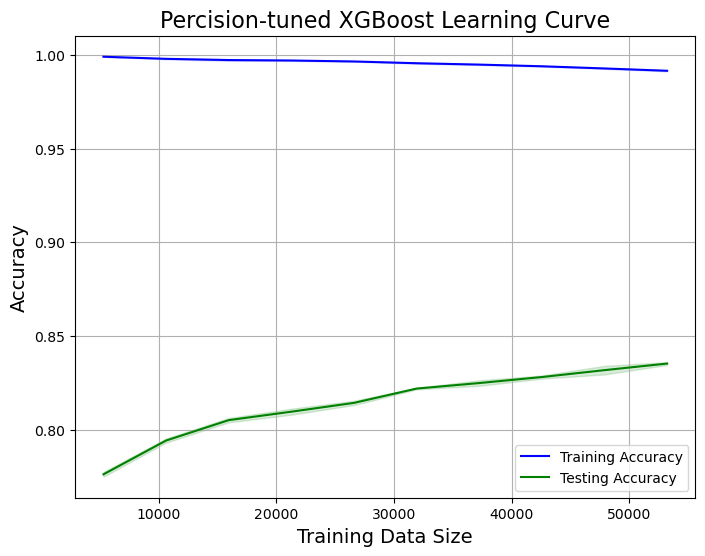

In [152]:
# Generate the learning curve data for XGBoost
train_sizes_xgb2, train_scores_xgb2, test_scores_xgb2 = learning_curve(xgb_2, X_train, y_train, cv=3, train_sizes=np.linspace(0.1, 1.0, 10),
                                                                    n_jobs=-1)

# Calculate the mean and standard deviation of the training and testing scores
train_mean_xgb2 = np.mean(train_scores_xgb, axis=1)
train_std_xgb2 = np.std(train_scores_xgb, axis=1)
test_mean_xgb2 = np.mean(test_scores_xgb, axis=1)
test_std_xgb2 = np.std(test_scores_xgb, axis=1)

# Plot the learning curve for XGBoost
plt.figure(figsize=(8, 6))
plt.plot(train_sizes_xgb2, train_mean_xgb2, label='Training Accuracy', color='b')
plt.fill_between(train_sizes_xgb2, train_mean_xgb2 - train_std_xgb2, train_mean_xgb2 + train_std_xgb2, alpha=0.15, color='b')
plt.plot(train_sizes_xgb2, test_mean_xgb2, label='Testing Accuracy', color='g')
plt.fill_between(train_sizes_xgb2, test_mean_xgb2 - test_std_xgb2, test_mean_xgb2 + test_std_xgb, alpha=0.15, color='g')

# Add labels and title
plt.xlabel('Training Data Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Percision-tuned XGBoost Learning Curve', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)

# Display the plot
plt.show()

_Fig 6.2: This visual shows how the Precision-tuned XGBoost model is learning and performing based on the train and test data!_

In [153]:
print("Tuned XGBoost Accuracy: ", (conf_matrix_xgb2[0,0]+conf_matrix_xgb2[1,1])/(conf_matrix_xgb2[0,0]+conf_matrix_xgb2[1,1]+conf_matrix_xgb2[0,1]+conf_matrix_xgb2[1,0]) )
print('')

print('Not Pupular Songs:')
print("Precision: ", (conf_matrix_xgb2[0,0])/(conf_matrix_xgb2[0,0]+conf_matrix_xgb2[0,1]) )
print("Recall: ", (conf_matrix_xgb2[0,0])/(conf_matrix_xgb2[0,0]+conf_matrix_xgb2[1,0]) )
print('')

print('Popular Songs:')
print("Precision: ", (conf_matrix_xgb2[1,1])/(conf_matrix_xgb2[1,1]+conf_matrix_xgb2[0,1]) )
print("Recall: ", (conf_matrix_xgb2[1,1])/(conf_matrix_xgb2[1,1]+conf_matrix_xgb2[1,0]) )
print('')

Tuned XGBoost Accuracy:  0.8596198830409356

Not Pupular Songs:
Precision:  0.9541758199406483
Recall:  0.8726824109975326

Popular Songs:
Precision:  0.7960548885077187
Recall:  0.5623409669211196



| Model                          | Precision (Popular) | Recall (Popular) | Precision (Not Popular) | Recall (Not Popular) | Accuracy |
|-------------------------------|---------------------|------------------|-------------------------|----------------------|----------|
| Baseline XGBoost               | 0.73                | 0.58             | 0.87                    | 0.93                | 0.85     | -        |
| Precision-Tuned XGBoost        | 0.80                | 0.56             | 0.95                    | 0.87                 | 0.86     | -        |

The precision-tuned XGBoost model **shows significant improvements in precision for both popular and not popular songs, with precision values of 0.80 and 0.95, respectively.** This indicates the model's ability to correctly classify more true positives among the predicted positive instances. Additionally, the precision-tuned model maintains a **reasonably good recall of 0.56 for popular songs and 0.87 for not popular songs, despite the inverse relationship between precision and recall.** This balance is crucial in real-world applications, especially in the music industry.

<a id="con"></a>
## Conclusion: Precision Tuned XGBoost Boost Is The WInner!

In conclusion, the precision-tuned XGBoost model with its specific parameters has proven highly effective for precise song popularity prediction. By utilizing all features in each tree, setting a smaller learning rate, and limiting tree depth, the model achieves better precision and avoids overfitting. With 500 estimators, it captures complex patterns, leading to higher precision. Additionally, handling class imbalance and enhancing generalization further contribute to its accuracy.

The precision-tuned XGBoost model holds significant value for the music industry, benefiting record label companies and new rising artists alike. Its high precision allows accurate identification of popular songs, optimizing resource allocation for record labels and guiding artists' career decisions. By leveraging this model, artists can gain insights into the potential popularity of their music, leading to better choices and increased motivation. Overall, the precision-tuned XGBoost model empowers the music industry with data-driven decisions, offering a competitive advantage in predicting song popularity and maximizing success.

<a id="fpl"></a>
## Future Plans

Moving forward, there are several opportunities to enhance the song popularity prediction model by incorporating user data and real-time information. By leveraging user data, such as listening habits, preferences, and feedback, the model can be personalized to individual users, improving its accuracy and relevance. Collaborating with music streaming platforms or other data providers can provide access to vast user data, enabling continuous model refinement.

Incorporating live data is crucial for handling cold-start issues, which occur when dealing with new songs or emerging artists with limited historical data. Real-time data, such as streaming counts, social media trends, and user interactions, can be integrated into the model to adapt quickly to changing music preferences and trends. By updating the model with live data, it becomes more agile in identifying potentially popular songs early on, even for new artists, mitigating cold-start challenges.

To further refine the model's performance, implementing an active learning approach can be beneficial. Active learning involves iteratively selecting the most informative samples for labeling, reducing the need for large labeled datasets. By actively seeking feedback from users or domain experts on uncertain predictions, the model can continuously learn and improve.

Finally, considering the ethical aspects of user data usage and ensuring user privacy are crucial steps in model development. Building trust with users and transparently communicating data usage practices will encourage user engagement and foster long-term relationships.

In conclusion, the future of the song popularity prediction model lies in leveraging user data, incorporating real-time information, and addressing cold-start challenges. By refining the model using live data, active learning, and ethical considerations, it can better serve the music industry, providing accurate predictions for song popularity and supporting both artists and music consumers.